# reviewing data

##manipulating data

In [97]:
import pandas as pd

In [98]:
chattogram_df = pd.read_csv("https://raw.githubusercontent.com/Data-Lab-CU/diarrhea/main/data/Chattogram.csv")
dhaka_df = pd.read_csv("https://raw.githubusercontent.com/Data-Lab-CU/diarrhea/main/data/Dhaka.csv")
khulna_df = pd.read_csv("https://raw.githubusercontent.com/Data-Lab-CU/diarrhea/main/data/Khulna.csv")
rajshahi_df = pd.read_csv("https://raw.githubusercontent.com/Data-Lab-CU/diarrhea/main/data/Rajshahi.csv")

### combined df



In [99]:
chattogram_dhaka_df = pd.merge(chattogram_df, dhaka_df, on='Date', how='inner', suffixes=('_Chattogram', '_Dhaka'))

khulna_rajshahi_df = pd.merge(khulna_df, rajshahi_df, on='Date', how='inner', suffixes=('_Khulna', '_Rajshahi'))

combined_df = pd.merge(chattogram_dhaka_df, khulna_rajshahi_df, on='Date', how='inner')

In [100]:
combined_df["Total Diarrhea"] = combined_df["Diarrhea_Chattogram"] + combined_df["Diarrhea_Dhaka"] + combined_df["Diarrhea_Khulna"] + combined_df["Diarrhea_Rajshahi"]
combined_df["Average Minimum Temperature"] = (combined_df["Minimum Temperature_Chattogram"] + combined_df["Minimum Temperature_Dhaka"] + combined_df["Minimum Temperature_Khulna"] + combined_df["Minimum Temperature_Rajshahi"]) / 4
combined_df["Average Maximum Temperature"] = (combined_df["Maximum Temperature_Chattogram"] + combined_df["Maximum Temperature_Dhaka"] + combined_df["Maximum Temperature_Khulna"] + combined_df["Maximum Temperature_Rajshahi"]) / 4
combined_df["Average Humidity"] = (combined_df["Humidity_Chattogram"] + combined_df["Humidity_Dhaka"] + combined_df["Humidity_Khulna"] + combined_df["Humidity_Rajshahi"]) / 4
combined_df["Average Preceptation"] = (combined_df["Preceptation_Chattogram"] + combined_df["Preceptation_Dhaka"] + combined_df["Preceptation_Khulna"] + combined_df["Preceptation_Rajshahi"]) / 4

### checking blank values

In [101]:
chattogram_df.isnull().sum()

,0
Date,0
Diarrhea,0
Minimum Temperature,0
Maximum Temperature,0
Humidity,0
Preceptation,0


In [102]:
dhaka_df.isnull().sum()

,0
Date,0
Diarrhea,0
Minimum Temperature,0
Maximum Temperature,0
Humidity,0
Preceptation,0


In [103]:
khulna_df.isnull().sum()

,0
Date,0
Diarrhea,0
Minimum Temperature,0
Maximum Temperature,0
Humidity,0
Preceptation,0


In [104]:
rajshahi_df.isnull().sum()

,0
Date,0
Diarrhea,0
Minimum Temperature,0
Maximum Temperature,0
Humidity,0
Preceptation,0


**no blank values**

###fixing date format

In [105]:
chattogram_df['Date'] = pd.to_datetime(chattogram_df['Date'])
dhaka_df['Date'] = pd.to_datetime(dhaka_df['Date'])
khulna_df['Date'] = pd.to_datetime(khulna_df['Date'])
rajshahi_df['Date'] = pd.to_datetime(rajshahi_df['Date'])

chattogram_df.head()

,Date,Diarrhea,Minimum Temperature,Maximum Temperature,Humidity,Preceptation
0,2022-01-01,14.0,12.06,23.21,85.69,0.0
1,2022-01-02,20.0,10.71,22.55,84.00,0.0
2,2022-01-03,15.0,10.86,23.70,83.06,0.0
3,2022-01-04,16.0,10.99,23.79,83.81,0.0
4,2022-01-05,20.0,10.52,23.49,80.56,0.0


##visualizing data

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

###scaling data for visualizing

In [107]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [108]:
chattogram_df_scaled_visualization = chattogram_df.copy()
dhaka_df_scaled_visualization = dhaka_df.copy()
khulna_df_scaled_visualization = khulna_df.copy()
rajshahi_df_scaled_visualization = rajshahi_df.copy()
combined_df_scaled_visualization = combined_df.copy()

In [109]:
chattogram_df_scaled_visualization[['Diarrhea', 'Minimum Temperature', 'Maximum Temperature', 'Humidity', 'Preceptation']] = scaler.fit_transform(chattogram_df[['Diarrhea', 'Minimum Temperature', 'Maximum Temperature', 'Humidity', 'Preceptation']])
dhaka_df_scaled_visualization[['Diarrhea', 'Minimum Temperature', 'Maximum Temperature', 'Humidity', 'Preceptation']] = scaler.fit_transform(dhaka_df[['Diarrhea', 'Minimum Temperature', 'Maximum Temperature', 'Humidity', 'Preceptation']])
khulna_df_scaled_visualization[['Diarrhea', 'Minimum Temperature', 'Maximum Temperature', 'Humidity', 'Preceptation']] = scaler.fit_transform(khulna_df[['Diarrhea', 'Minimum Temperature', 'Maximum Temperature', 'Humidity', 'Preceptation']])
rajshahi_df_scaled_visualization[['Diarrhea', 'Minimum Temperature', 'Maximum Temperature', 'Humidity', 'Preceptation']] = scaler.fit_transform(rajshahi_df[['Diarrhea', 'Minimum Temperature', 'Maximum Temperature', 'Humidity', 'Preceptation']])
combined_df_scaled_visualization[['Total Diarrhea', 'Average Minimum Temperature', 'Average Maximum Temperature', 'Average Humidity', 'Average Preceptation']] = scaler.fit_transform(combined_df[['Total Diarrhea', 'Average Minimum Temperature', 'Average Maximum Temperature', 'Average Humidity', 'Average Preceptation']])

###chattogram

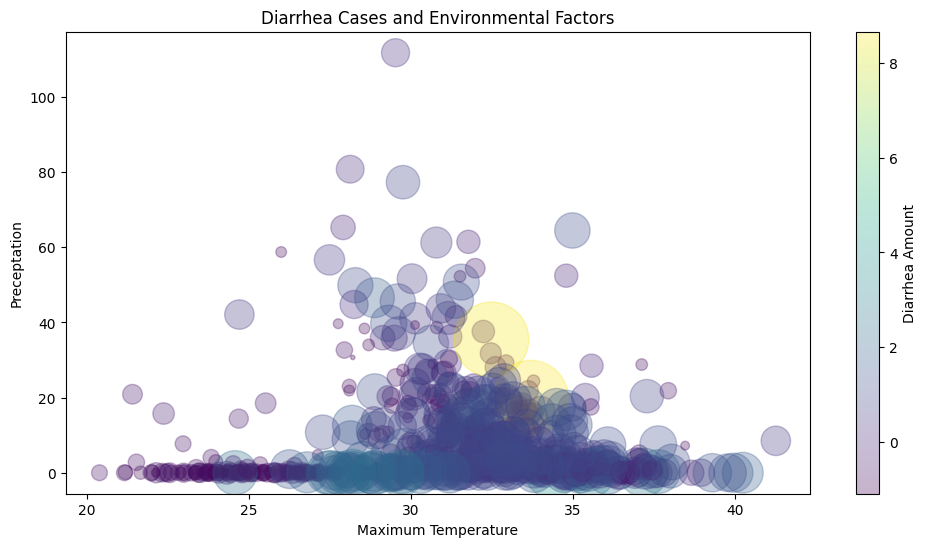

In [110]:
plt.figure(figsize=(12, 6))

# Scatter plot with x as 'Maximum Temperature', y as 'Preceptation', and circle size proportional to 'Diarrhea'
plt.scatter(chattogram_df['Maximum Temperature'],
            chattogram_df['Preceptation'],
            s=chattogram_df['Diarrhea']*10,  # Scale the size for better visibility
            alpha=0.3,  # Adjust transparency for better overlap visibility
            c=chattogram_df_scaled_visualization['Diarrhea'],  # Color by the amount of diarrhea
            cmap='viridis')  # You can change the colormap if needed

# Add labels and title
plt.title("Diarrhea Cases and Environmental Factors")
plt.xlabel("Maximum Temperature")
plt.ylabel("Preceptation")

# Add color bar to show the mapping of color to Diarrhea amount
plt.colorbar(label='Diarrhea Amount')

# Show the plot
plt.show()


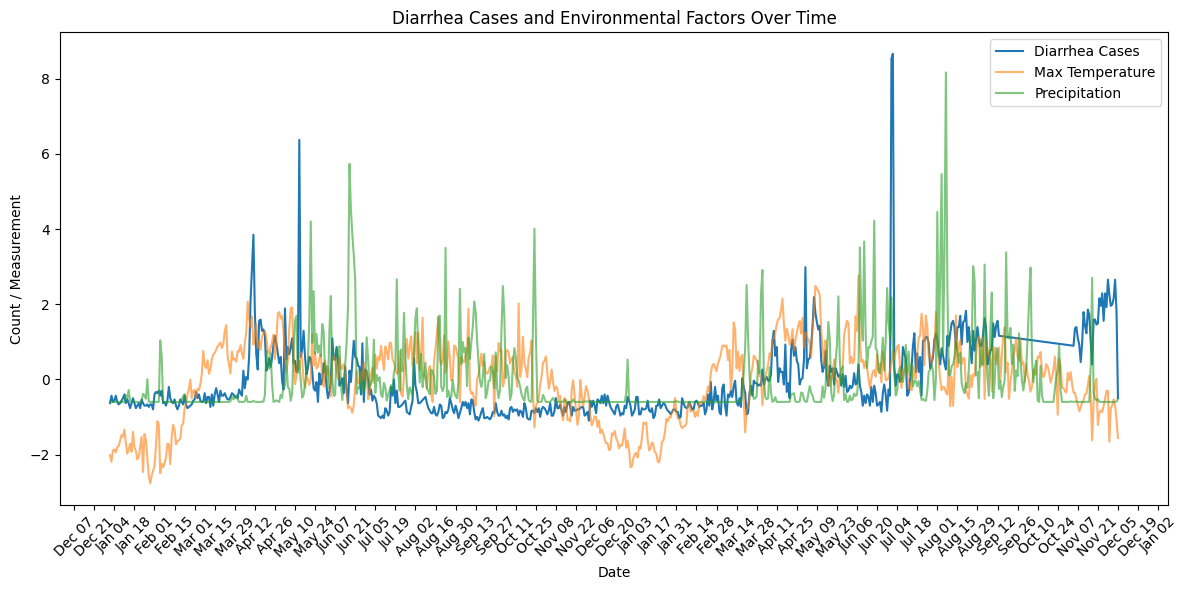

In [111]:
plt.figure(figsize=(12, 6))

# Plot the data
plt.plot(chattogram_df_scaled_visualization['Date'], chattogram_df_scaled_visualization['Diarrhea'], label='Diarrhea Cases')
plt.plot(chattogram_df_scaled_visualization['Date'], chattogram_df_scaled_visualization['Maximum Temperature'], label='Max Temperature', alpha=0.6)
plt.plot(chattogram_df_scaled_visualization['Date'], chattogram_df_scaled_visualization['Preceptation'], label='Precipitation', alpha=0.6)

# Rotate the x-axis labels to prevent overlap
plt.xticks(rotation=45)

# Set date formatter and locator to avoid overlapping date labels
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))  # Display dates as "Month Day" (e.g., Jan 01)
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))  # Show ticks every 2 weeks (adjust based on dataset size)

# Add legend and labels
plt.legend()
plt.title("Diarrhea Cases and Environmental Factors Over Time")
plt.xlabel("Date")
plt.ylabel("Count / Measurement")

# Automatically adjust layout to prevent labels from being cut off
plt.tight_layout()

# Display the plot
plt.show()


###dhaka

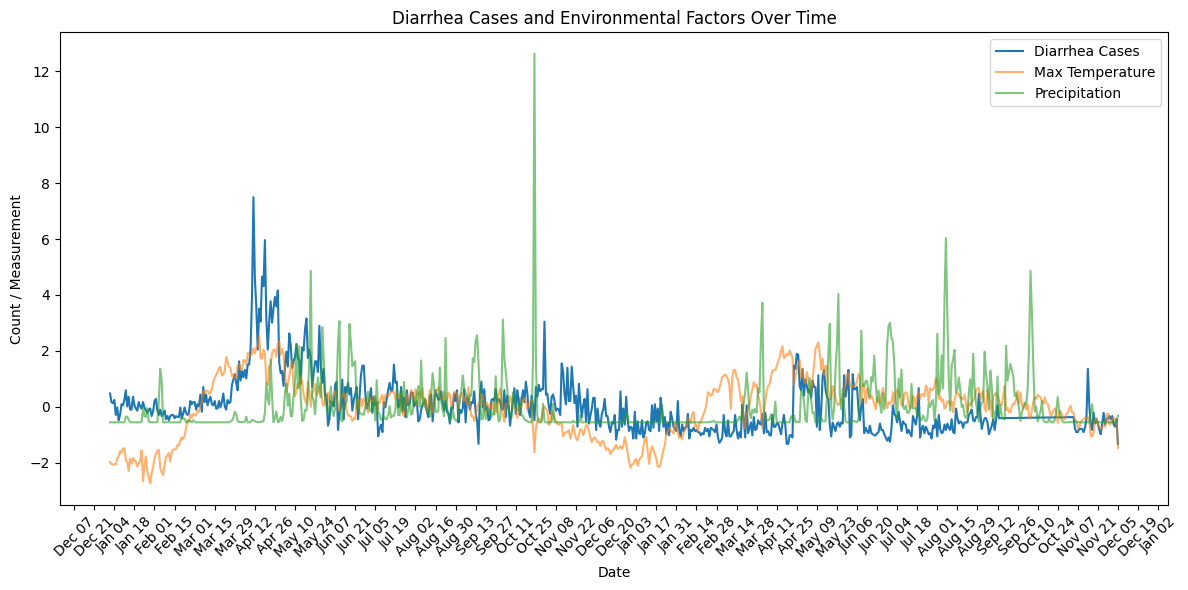

In [112]:
plt.figure(figsize=(12, 6))

# Plot the data
plt.plot(dhaka_df_scaled_visualization['Date'], dhaka_df_scaled_visualization['Diarrhea'], label='Diarrhea Cases')
plt.plot(dhaka_df_scaled_visualization['Date'], dhaka_df_scaled_visualization['Maximum Temperature'], label='Max Temperature', alpha=0.6)
plt.plot(dhaka_df_scaled_visualization['Date'], dhaka_df_scaled_visualization['Preceptation'], label='Precipitation', alpha=0.6)

# Rotate the x-axis labels to prevent overlap
plt.xticks(rotation=45)

# Set date formatter and locator to avoid overlapping date labels
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))  # Display dates as "Month Day" (e.g., Jan 01)
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))  # Show ticks every 2 weeks (adjust based on dataset size)

# Add legend and labels
plt.legend()
plt.title("Diarrhea Cases and Environmental Factors Over Time")
plt.xlabel("Date")
plt.ylabel("Count / Measurement")

# Automatically adjust layout to prevent labels from being cut off
plt.tight_layout()

# Display the plot
plt.show()


###khulna

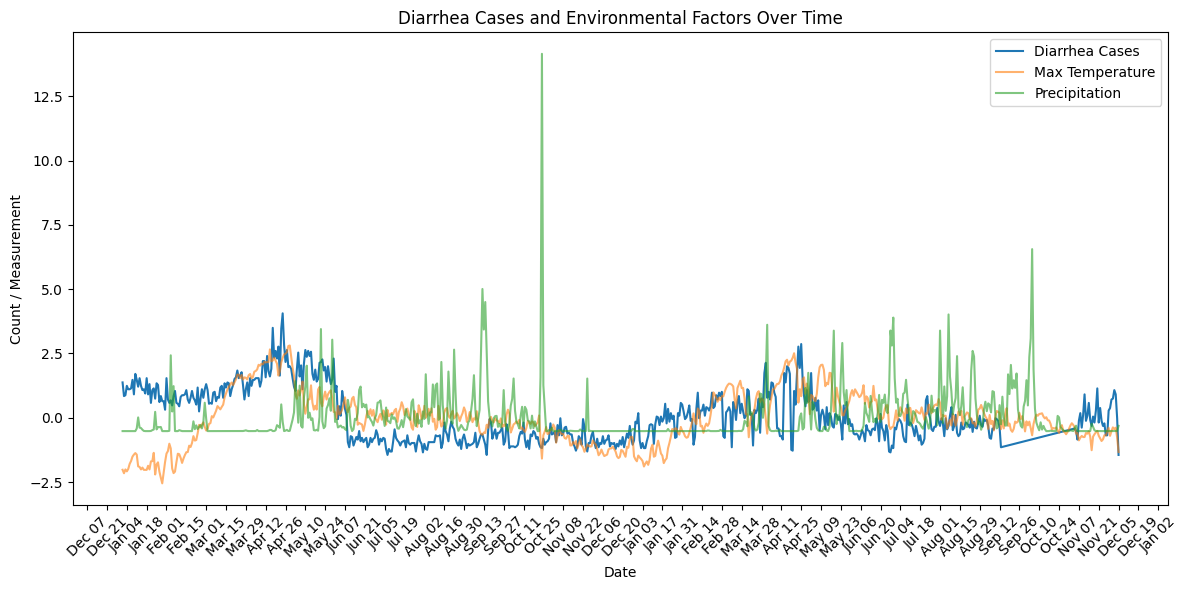

In [113]:
plt.figure(figsize=(12, 6))

# Plot the data
plt.plot(khulna_df_scaled_visualization['Date'], khulna_df_scaled_visualization['Diarrhea'], label='Diarrhea Cases')
plt.plot(khulna_df_scaled_visualization['Date'], khulna_df_scaled_visualization['Maximum Temperature'], label='Max Temperature', alpha=0.6)
plt.plot(khulna_df_scaled_visualization['Date'], khulna_df_scaled_visualization['Preceptation'], label='Precipitation', alpha=0.6)

# Rotate the x-axis labels to prevent overlap
plt.xticks(rotation=45)

# Set date formatter and locator to avoid overlapping date labels
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))  # Display dates as "Month Day" (e.g., Jan 01)
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))  # Show ticks every 2 weeks (adjust based on dataset size)

# Add legend and labels
plt.legend()
plt.title("Diarrhea Cases and Environmental Factors Over Time")
plt.xlabel("Date")
plt.ylabel("Count / Measurement")

# Automatically adjust layout to prevent labels from being cut off
plt.tight_layout()

# Display the plot
plt.show()


###rajshahi

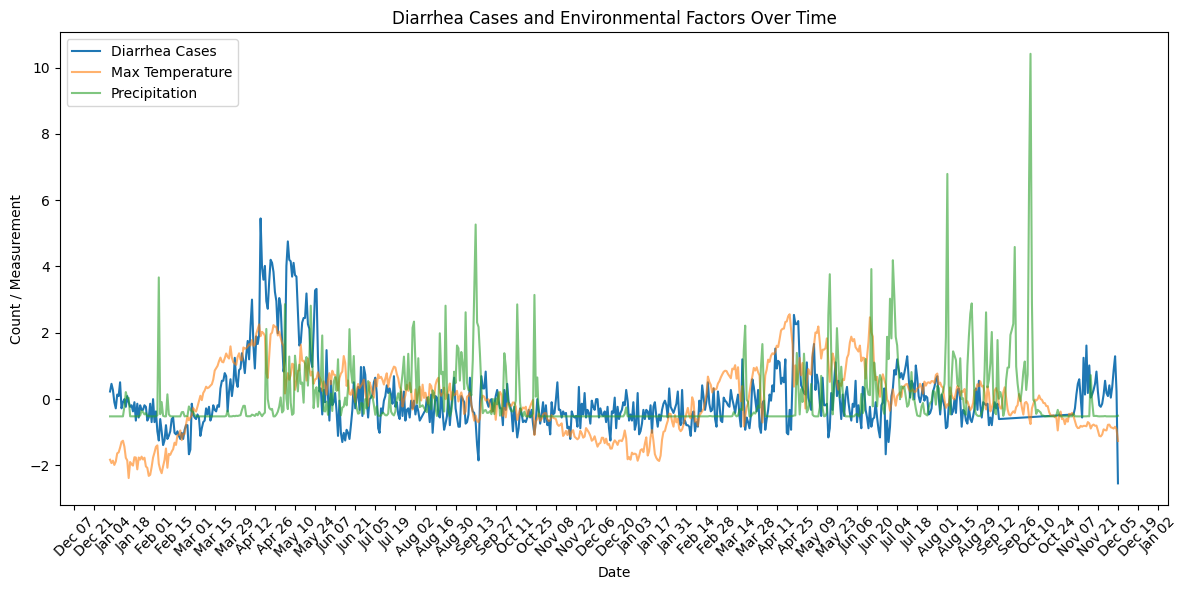

In [114]:
plt.figure(figsize=(12, 6))

# Plot the data
plt.plot(rajshahi_df_scaled_visualization['Date'], rajshahi_df_scaled_visualization['Diarrhea'], label='Diarrhea Cases')
plt.plot(rajshahi_df_scaled_visualization['Date'], rajshahi_df_scaled_visualization['Maximum Temperature'], label='Max Temperature', alpha=0.6)
plt.plot(rajshahi_df_scaled_visualization['Date'], rajshahi_df_scaled_visualization['Preceptation'], label='Precipitation', alpha=0.6)

# Rotate the x-axis labels to prevent overlap
plt.xticks(rotation=45)

# Set date formatter and locator to avoid overlapping date labels
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))  # Display dates as "Month Day" (e.g., Jan 01)
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))  # Show ticks every 2 weeks (adjust based on dataset size)

# Add legend and labels
plt.legend()
plt.title("Diarrhea Cases and Environmental Factors Over Time")
plt.xlabel("Date")
plt.ylabel("Count / Measurement")

# Automatically adjust layout to prevent labels from being cut off
plt.tight_layout()

# Display the plot
plt.show()


###combined

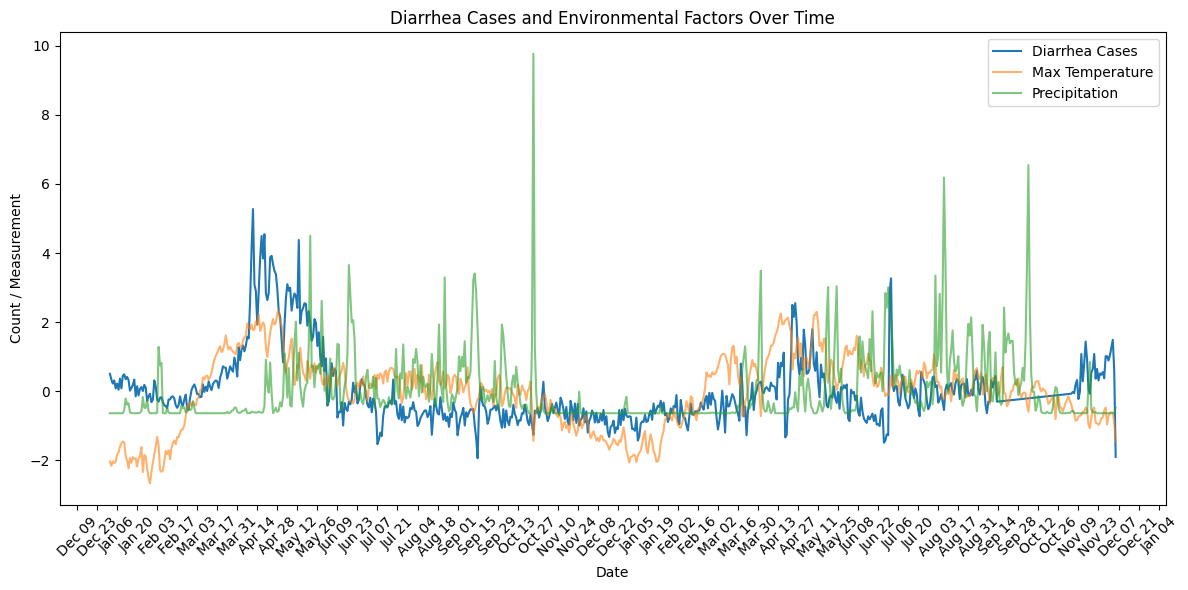

In [115]:
plt.figure(figsize=(12, 6))

# Plot the data
plt.plot(combined_df_scaled_visualization['Date'], combined_df_scaled_visualization['Total Diarrhea'], label='Diarrhea Cases')
plt.plot(combined_df_scaled_visualization['Date'], combined_df_scaled_visualization['Average Maximum Temperature'], label='Max Temperature', alpha=0.6)
plt.plot(combined_df_scaled_visualization['Date'], combined_df_scaled_visualization['Average Preceptation'], label='Precipitation', alpha=0.6)

# Rotate the x-axis labels to prevent overlap
plt.xticks(rotation=45)

# Set date formatter and locator to avoid overlapping date labels
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))  # Display dates as "Month Day" (e.g., Jan 01)
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))  # Show ticks every 2 weeks (adjust based on dataset size)

# Add legend and labels
plt.legend()
plt.title("Diarrhea Cases and Environmental Factors Over Time")
plt.xlabel("Date")
plt.ylabel("Count / Measurement")

# Automatically adjust layout to prevent labels from being cut off
plt.tight_layout()

# Display the plot
plt.show()
